In [9]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import pydicom

In [10]:
# load json file subsets.json
with open('./subsets.json') as f:
    subsets = json.load(f)
# del "test/AUROC" key value pair
del subsets["test/AUROC"]

In [11]:
k = 5

In [12]:
os.getcwd()

'/home/getznerj/PycharmProjects/thesis/src_refactored'

In [13]:
# split subsets into two lists, one with young and female and one with old and male
subsets_female_young = {key:value for key, value in subsets.items() if "female" in key or "young" in key}
subsets_male_old = {key:value for key, value in subsets.items() if ("male" in key or "old" in key) and "female" not in key}

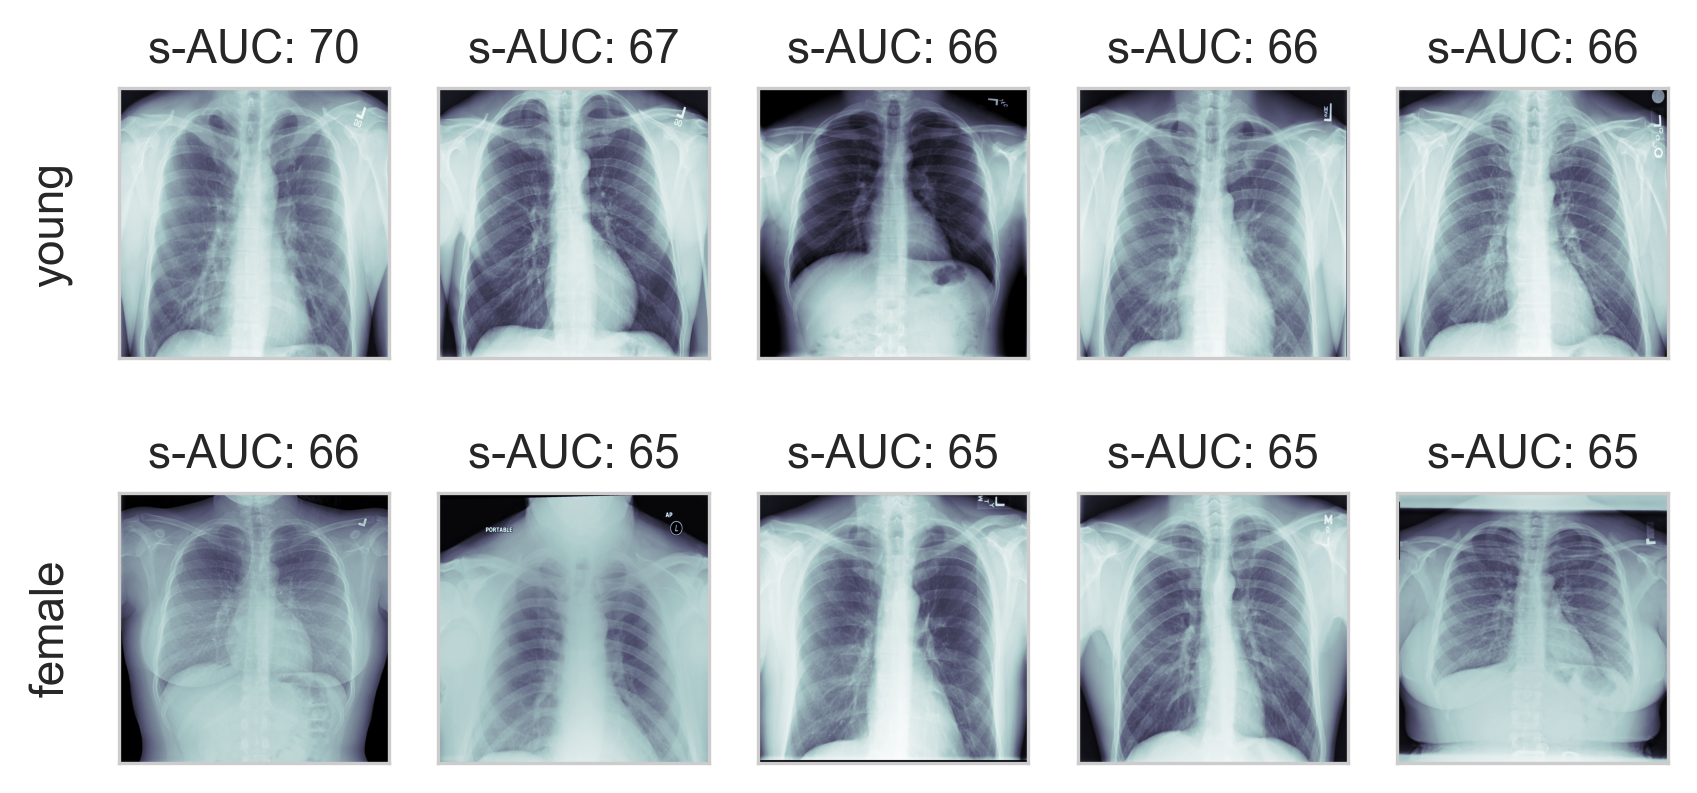

FileNotFoundError: [Errno 2] No such file or directory: '../src/figures/best_subset_female.png'

<Figure size 1920x1440 with 0 Axes>

In [24]:
# get subsets young and female from subset key
for subset_set in [subsets_female_young, subsets_male_old]:
    fontSize = 11
    rc={"figure.dpi": 300, 'savefig.dpi': 300, 'axes.labelsize': fontSize, 'axes.titlesize': fontSize, 'font.size': fontSize}
    plt.rcParams.update(rc)
    fig, axs = plt.subplots(2, k, figsize=(5.78853, 3), sharey=True, sharex=True)
    for row, (subset_name, subset) in enumerate(subset_set.items()):
        if "young" in subset_name:
            s = "young"
        elif "old" in subset_name:
            s = "old"
        elif "female" in subset_name:
            s = "female"
        else:
            s = "male"
        top_k_filenames = subset["filenames"][:k]
        top_k_filenames = [f[2:] for f in top_k_filenames]
        top_k_filenames = [os.path.join("../src/",f) for f in top_k_filenames]
        top_k_scores = subset["scores"][:k]
        for i, f in enumerate(top_k_filenames):
            ds = pydicom.dcmread(f)
            axs[row,i].imshow(ds.pixel_array, cmap=plt.cm.bone)
            axs[row,i].grid(False)
            # turn of axis tick labels 
            axs[row,i].set_xticklabels([])
            axs[row,i].set_yticklabels([])
            axs[row,i].set_title(f"s-AUC: {top_k_scores[i]*100:.0f}")
            axs[row,0].set_ylabel(s)
    plt.tight_layout()
    plt.show()
    plt.savefig(f"../src/figures/best_subset_{s}.png")